In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dataset_caba.csv')

data.drop(columns=['Unnamed: 0'],inplace=True)


data['barriocat'] = data['place_name_normalized'].astype('category').cat.codes


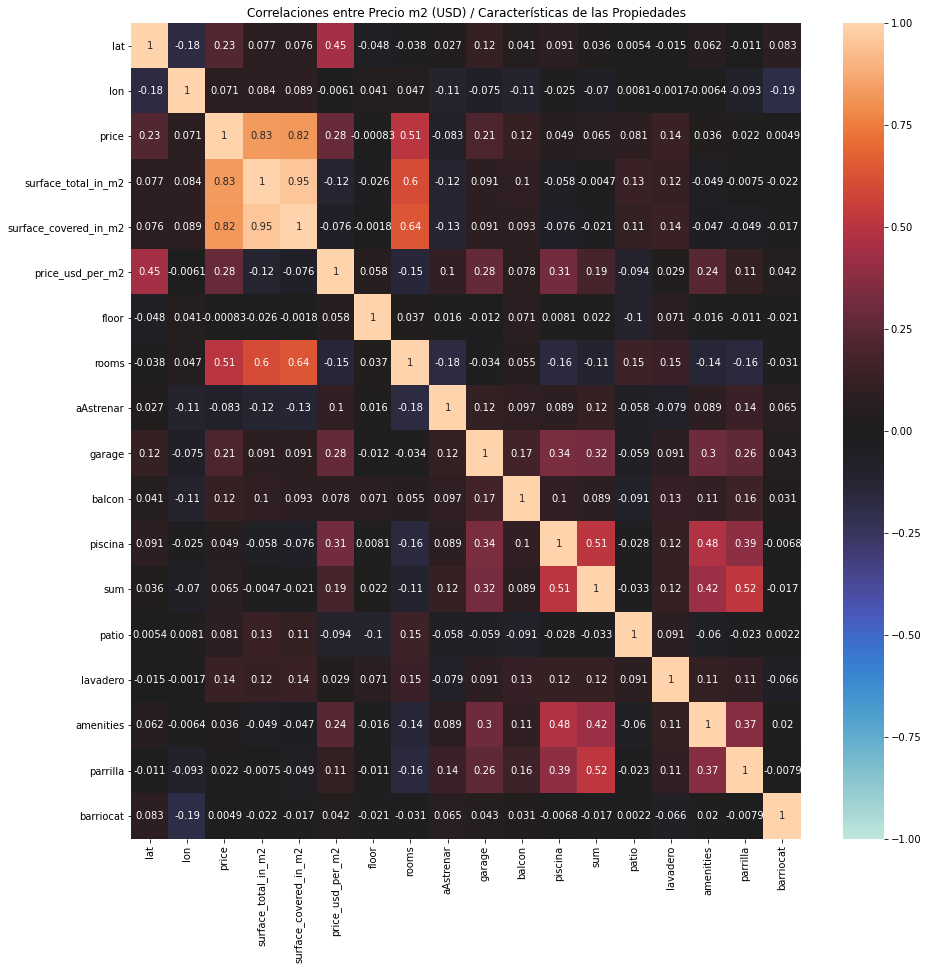

In [2]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Correlaciones entre Precio m2 (USD) / Características de las Propiedades', )

sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,  annot=True);

## Dummies - Tipo de propiedad - Barrio - Disposición

In [3]:
#Convertimos a dummy la disposicion
df_dummies = data

df_dummies = pd.concat([data, pd.get_dummies(data = data['disposicion'], prefix= 'disp_')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['place_name_normalized'], prefix= 'barrio_place_name_normalized')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['property_type'], prefix= 'tipo_name_property_type')], axis = 1)

df_dummies.drop(columns=['surface_covered_in_m2','surface_total_in_m2','price','Point','disposicion','place_name_normalized','property_type','place_name','lat','lon','lat-lon','title','description'],inplace=True)


In [4]:
df_dummies.describe()


,price_usd_per_m2,floor,rooms,aAstrenar,garage,balcon,piscina,sum,patio,lavadero,...,barrio_place_name_normalized_Villa Pueyrredón,barrio_place_name_normalized_Villa Real,barrio_place_name_normalized_Villa Riachuelo,barrio_place_name_normalized_Villa Santa Rita,barrio_place_name_normalized_Villa Soldati,barrio_place_name_normalized_Villa Urquiza,barrio_place_name_normalized_Villa del Parque,tipo_name_property_type_PH,tipo_name_property_type_apartment,tipo_name_property_type_house
count,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,...,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,2380.967330,3.044993,2.442275,0.106077,0.399313,0.653648,0.226215,0.293704,0.367911,0.456335,...,0.004687,0.001250,0.000625,0.006405,0.000781,0.036401,0.008124,0.019997,0.979222,0.000781
std,621.832604,3.339373,1.387158,0.307960,0.489795,0.475844,0.418412,0.455494,0.482275,0.498129,...,0.068305,0.035333,0.024992,0.079782,0.027940,0.187299,0.089772,0.140000,0.142652,0.027940
min,208.713217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.588235,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2346.938776,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2796.610169,5.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3995.000000,24.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [6]:
def print_metrics(y_real,y_pred):
    print('MAE:', round(metrics.mean_absolute_error(y_real, y_pred),2))
    print('MSE:', round(metrics.mean_squared_error(y_real, y_pred),2))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_real, y_pred)),2))
    print('R2:', round(r2_score(y_real, y_pred),2))
    

In [7]:

X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']

#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)


Para el train set:
MAE: 346.14
MSE: 209199.62
RMSE: 457.38
R2: 0.46
------------------------------
Para el test set:
MAE: 354.33
MSE: 214894.02
RMSE: 463.57
R2: 0.43
------------------------------


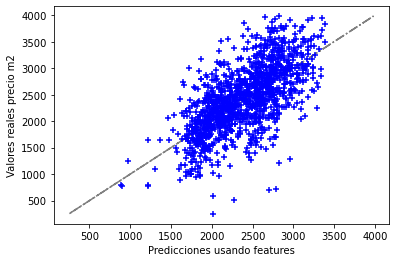

[0.44833334 0.41712705 0.44291272 0.45627521 0.44837697]


In [8]:

lm = linear_model.LinearRegression()

model_linreg = lm.fit(X_train, y_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg.predict(X_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg.predict(X_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(y_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(y_test,y_pred_ts_lm)
print("------------------------------")


plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred_ts_lm, y_test, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

print(cross_val_score(model_linreg, X_train, y_train, cv=5))  


## Regresión lineal con estandarización

Para el train set:
MAE: 346.17
MSE: 209232.44
RMSE: 457.42
R2: 0.46
------------------------------
Para el test set:
MAE: 354.26
MSE: 214917.2
RMSE: 463.59
R2: 0.43
------------------------------


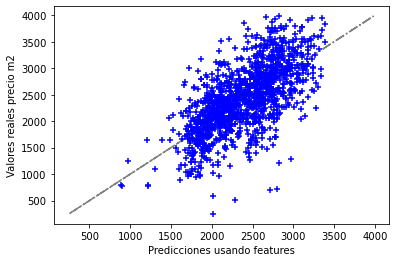

[ 4.48367415e-01 -6.13723668e+25  4.43028223e-01  4.55067592e-01
  4.48396342e-01]


In [9]:

stdscalerX = StandardScaler()

X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']

#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)

Xs_train = stdscalerX.fit_transform(X_train)
ys_train = y_train

Xs_test = stdscalerX.transform(X_test)
ys_test = y_test

#lmreg = linear_model.LinearRegression()
model_linreg_std = lm.fit(Xs_train,ys_train)

#Predicciones del modelo para el set de entrenamiento
y_pred_tr_lm = model_linreg_std.predict(Xs_train)
#Predicciones del modelo para el set de testeo
y_pred_ts_lm = model_linreg_std.predict(Xs_test)

#Métricas del modelo para el set de entrenamiento
print("Para el train set:")
print_metrics(ys_train,y_pred_tr_lm)
print("------------------------------")

#Métricas del modelo para el set de testeo
print("Para el test set:")
print_metrics(ys_test,y_pred_ts_lm)
print("------------------------------")

plt.plot(ys_test,ys_test, '-.', c='grey')
plt.scatter(y_pred_ts_lm, ys_test, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

print(cross_val_score(model_linreg, Xs_train, ys_train, cv=5)) 

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     62.72
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:13:47   Log-Likelihood:                -36243.
No. Observations:                4800   AIC:                         7.261e+04
Df Residuals:                    4737   BIC:                         7.302e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

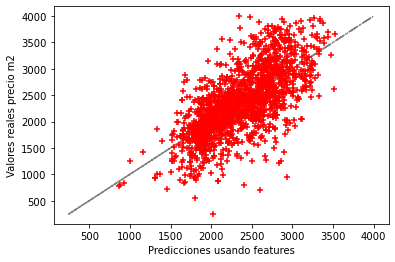

In [10]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print (model.summary())
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print ('MSE:', metrics.mean_squared_error(y_test, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Ridge

MAE:  359.0643183334197
MSE:  220333.25507189884
RMSE: 469.3966926512146
R2:   0.4115249541333904


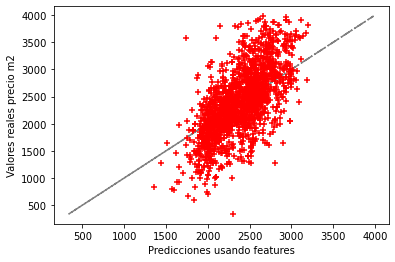

In [11]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
ridgemodel = linear_model.Ridge(alpha= 0.5, normalize=True)
ridgemodel.fit(X_train, y_train)
y_pred = ridgemodel.predict(X_test)   

print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Lasso

MAE:  352.3775366314487
MSE:  209292.74806587017
RMSE: 457.485243549855
R2:   0.4460702090536368


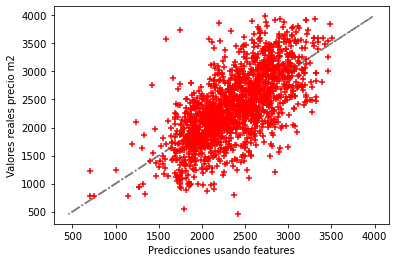

In [12]:
X = df_dummies.drop(['price_usd_per_m2'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = linear_model.LassoCV(alphas=np.linspace(0.001,100, 1000),max_iter = 10000, cv=3, normalize=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()